### Setup
#### 1.1 Library and duckdb file import

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

In [2]:
import pandas as pd
import os, sys

sys.path.append(os.path.abspath(".."))

from src.utils import get_athena_connection, read_sql_df
from src.config import DB_ATHENA


# Athena connection
conn = get_athena_connection()
print(f"Connected to Athena database:'{DB_ATHENA}'")

def run_sql(sql: str) -> pd.DataFrame:
    """
    Execute a SQL query on Athena (MovieLens 32M) and return a Pandas DataFrame.
    """
    return read_sql_df(sql, conn=conn)

Connected to Athena database:'movielens32m'


#### 1.2 Tables from the original dataset
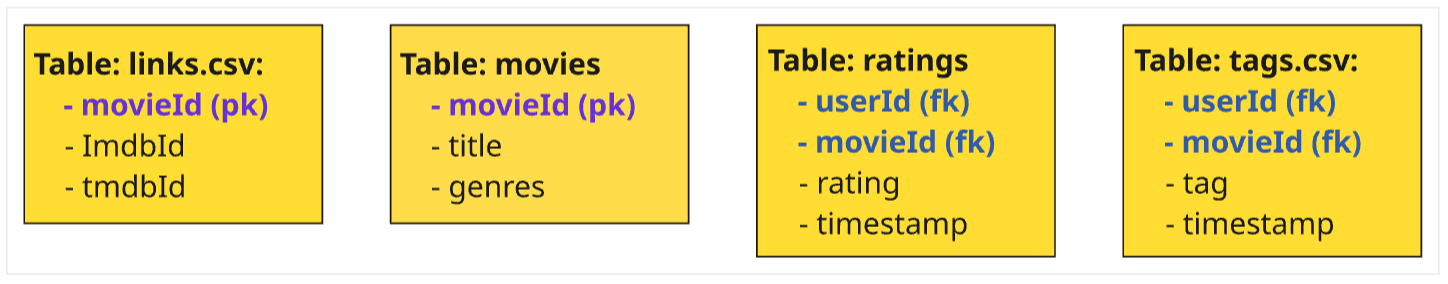




### 2 Research Questions:
#### 2.1 Highest rating movies (with at least 50 ratings)

In [3]:
# Find the 20 movies with the highest average rating (with at least 50 ratings)
df1 = run_sql("""
SELECT
    m.title,
    ROUND(AVG(r.rating), 2) AS media_rating,
    COUNT(*)                AS total_ratings
FROM ratings_parquet AS r
JOIN movies_parquet AS m
    ON r.movieid = m.movieid
GROUP BY m.title
HAVING COUNT(*) >= 50
ORDER BY media_rating DESC, total_ratings DESC
LIMIT 20
""")

df1


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,title,media_rating,total_ratings
0,Planet Earth II (2016),4.45,1956
1,Planet Earth (2006),4.44,2948
2,Band of Brothers (2001),4.43,2811
3,"Shawshank Redemption, The (1994)",4.40,102929
4,Cosmos,4.33,615
5,"Godfather, The (1972)",4.32,66440
6,Parasite (2019),4.31,11670
7,Blue Planet II (2017),4.30,1163
8,Twin Peaks (1989),4.30,1140
9,Twelve Angry Men (1954),4.29,449


In [4]:
df1.columns

Index(['title', 'media_rating', 'total_ratings'], dtype='object')

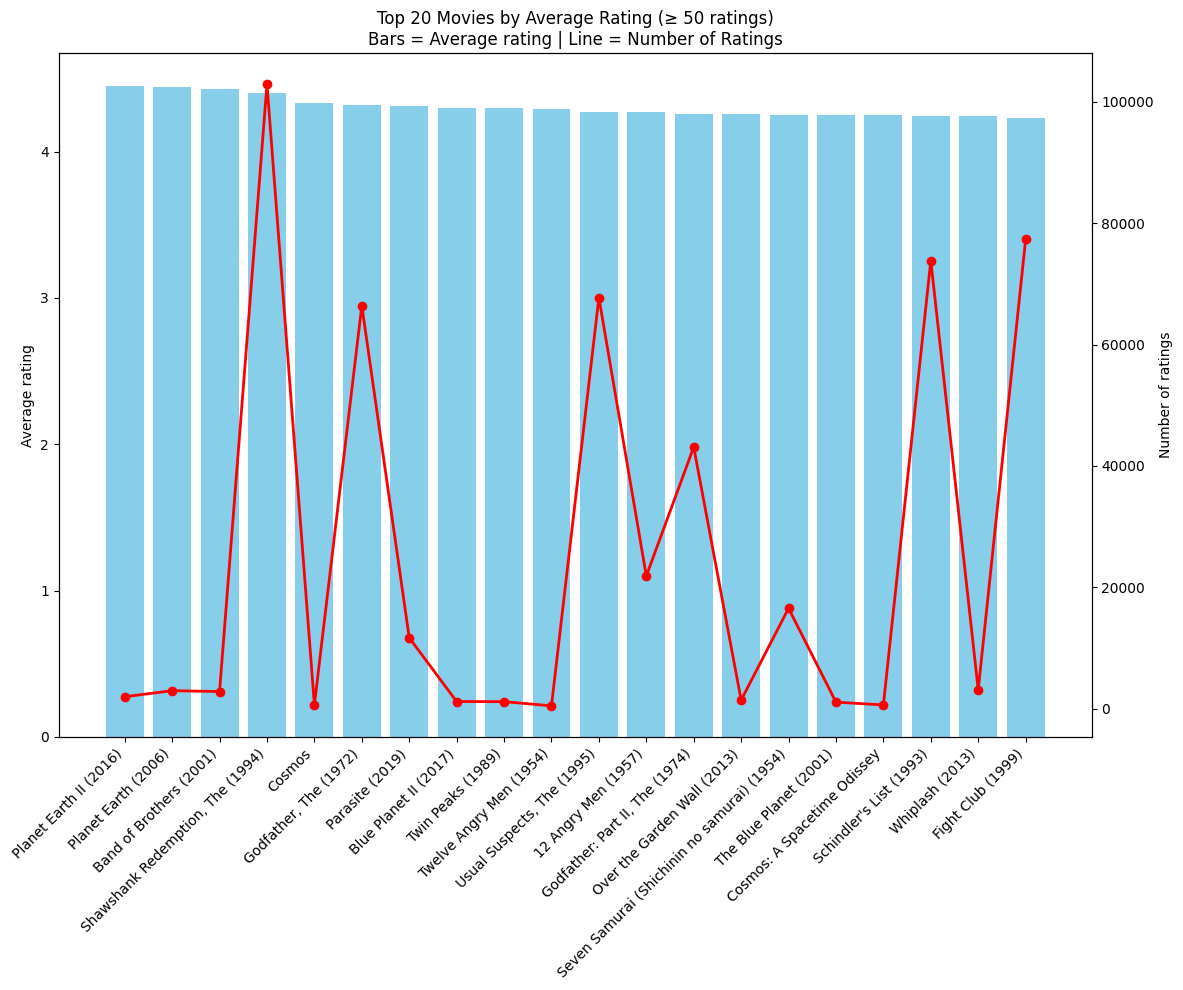

In [5]:
# Combined plot: bars = average rating, line = number of ratings
fig, ax1 = plt.subplots(figsize=(12, 10))

# Bars showing the average rating (blue)
ax1.bar(df1["title"], df1["media_rating"], color="skyblue")
ax1.set_ylabel("Average rating")
ax1.set_xticks(range(len(df1)))
ax1.set_xticklabels(df1["title"], rotation=45, ha="right")

# Line showing the number of ratings (red)
ax2 = ax1.twinx()
ax2.plot(range(len(df1)), df1["total_ratings"], marker="o", color="red", linewidth=2)
ax2.set_ylabel("Number of ratings")

plt.title("Top 20 Movies by Average Rating (≥ 50 ratings)\nBars = Average rating | Line = Number of Ratings")
plt.tight_layout()
plt.show()


#### 2.2 Best rated movies

In [7]:
# Ranking of the 20 movies with the highest number of ratings
df2 = run_sql("""
SELECT
    m.title,
    COUNT(*) AS total_ratings,
    ROUND(AVG(r.rating), 2) AS media_rating
FROM ratings_parquet AS r
JOIN movies_parquet AS m
    ON r.movieid = m.movieid
GROUP BY m.title
ORDER BY total_ratings DESC, media_rating DESC
LIMIT 20
""")

df2

c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,title,total_ratings,media_rating
0,"Shawshank Redemption, The (1994)",102929,4.40
1,Forrest Gump (1994),100296,4.05
2,Pulp Fiction (1994),98409,4.20
3,"Matrix, The (1999)",93808,4.16
4,"Silence of the Lambs, The (1991)",90330,4.15
5,Star Wars: Episode IV - A New Hope (1977),85010,4.10
6,Fight Club (1999),77332,4.23
7,Jurassic Park (1993),75233,3.70
8,Schindler's List (1993),73849,4.24
9,"Lord of the Rings: The Fellowship of the Ring,...",73122,4.09


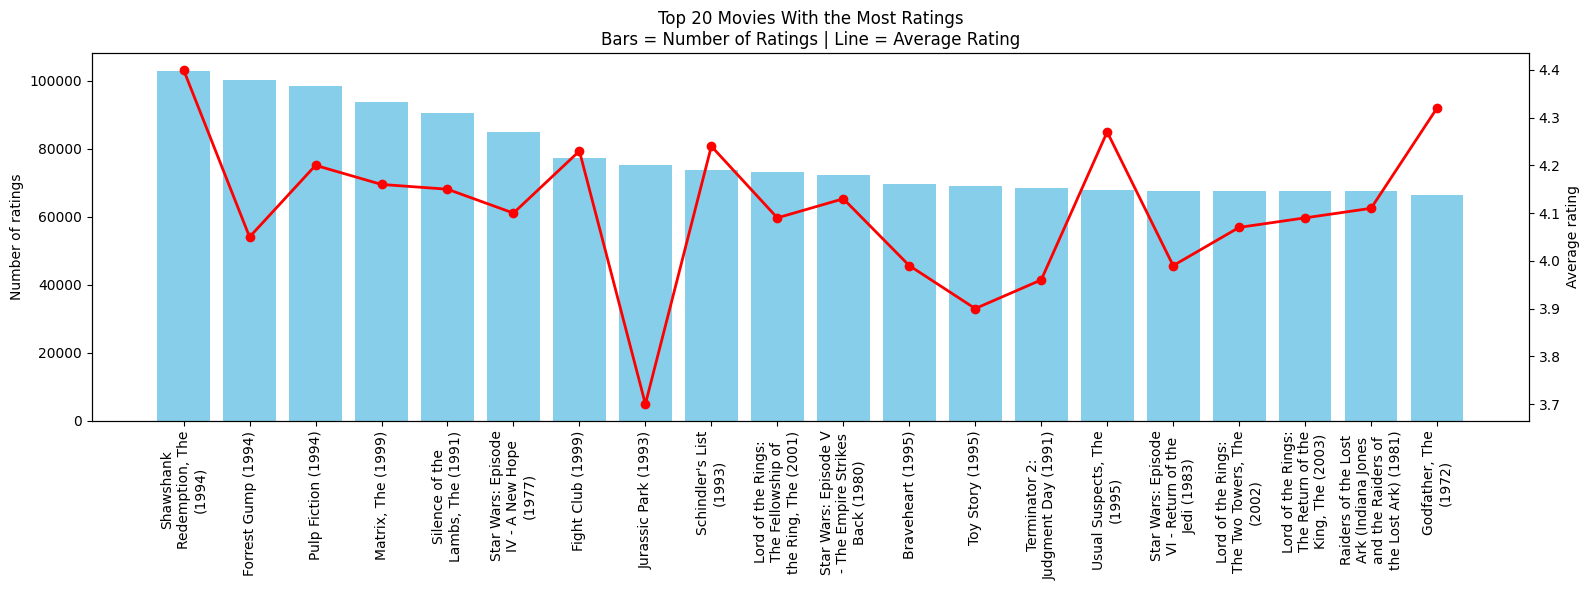

In [ ]:
# ranking of the 20 movies with the most ratings
fig, ax1 = plt.subplots(figsize=(16, 6))

# Wrap titles into multiple lines (≈20 chars per line)
wrapped_titles = ["\n".join(textwrap.wrap(t, 20)) for t in df2["title"]]

# Bars = number of ratings (blue)
ax1.bar(df2["title"], df2["total_ratings"], color="skyblue")
ax1.set_ylabel("Number of ratings")
ax1.set_xticks(range(len(df2)))
ax1.set_xticklabels(wrapped_titles, rotation=90, ha="center")  # melhor sem rotação

# Line = average rating (red)
ax2 = ax1.twinx()
ax2.plot(range(len(df2)), df2["media_rating"], marker="o", color="red", linewidth=2)
ax2.set_ylabel("Average rating")

plt.title("Top 20 Movies With the Most Ratings\nBars = Number of Ratings | Line = Average Rating")
plt.tight_layout()
plt.show()


#### 2.3 Best movies by Genre (with at least 50 ratings)

In [11]:
# Ranking of movies by genre (with at least 50 ratings)
df3 = run_sql("""
WITH movie_genre AS (
    SELECT
        m.movieid,
        m.title,
        genre
    FROM movies_parquet AS m
    CROSS JOIN UNNEST(split(m.genres, '|')) AS t(genre)
),
movie_genre_stats AS (
    SELECT
        mg.genre,
        mg.movieid,
        mg.title,
        COUNT(*) AS total_ratings,
        AVG(r.rating) AS media_rating
    FROM movie_genre AS mg
    JOIN ratings_parquet AS r
        ON r.movieid = mg.movieid
    GROUP BY mg.genre, mg.movieid, mg.title
    HAVING COUNT(*) >= 50    -- minimum of 50 ratings
),
genre_ranking AS (
    SELECT
        genre,
        movieid,
        title,
        total_ratings,
        media_rating,
        ROW_NUMBER() OVER (
            PARTITION BY genre
            ORDER BY media_rating DESC, total_ratings DESC
        ) AS position
    FROM movie_genre_stats
)
SELECT
    genre,
    title,
    ROUND(media_rating, 2) AS media_rating,
    total_ratings
FROM genre_ranking
WHERE position = 1
ORDER BY genre
""")

df3

c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,genre,title,media_rating,total_ratings
0,(no genres listed),Cosmos,4.33,615
1,Action,Band of Brothers (2001),4.43,2811
2,Adventure,Over the Garden Wall (2013),4.26,1397
3,Animation,Over the Garden Wall (2013),4.26,1397
4,Children,My Neighbor Totoro (Tonari no Totoro) (1988),4.16,13556
5,Comedy,Parasite (2019),4.31,11670
6,Crime,"Shawshank Redemption, The (1994)",4.40,102929
7,Documentary,Planet Earth II (2016),4.45,1956
8,Drama,Band of Brothers (2001),4.43,2811
9,Fantasy,Spirited Away (Sen to Chihiro no kamikakushi) ...,4.21,33333


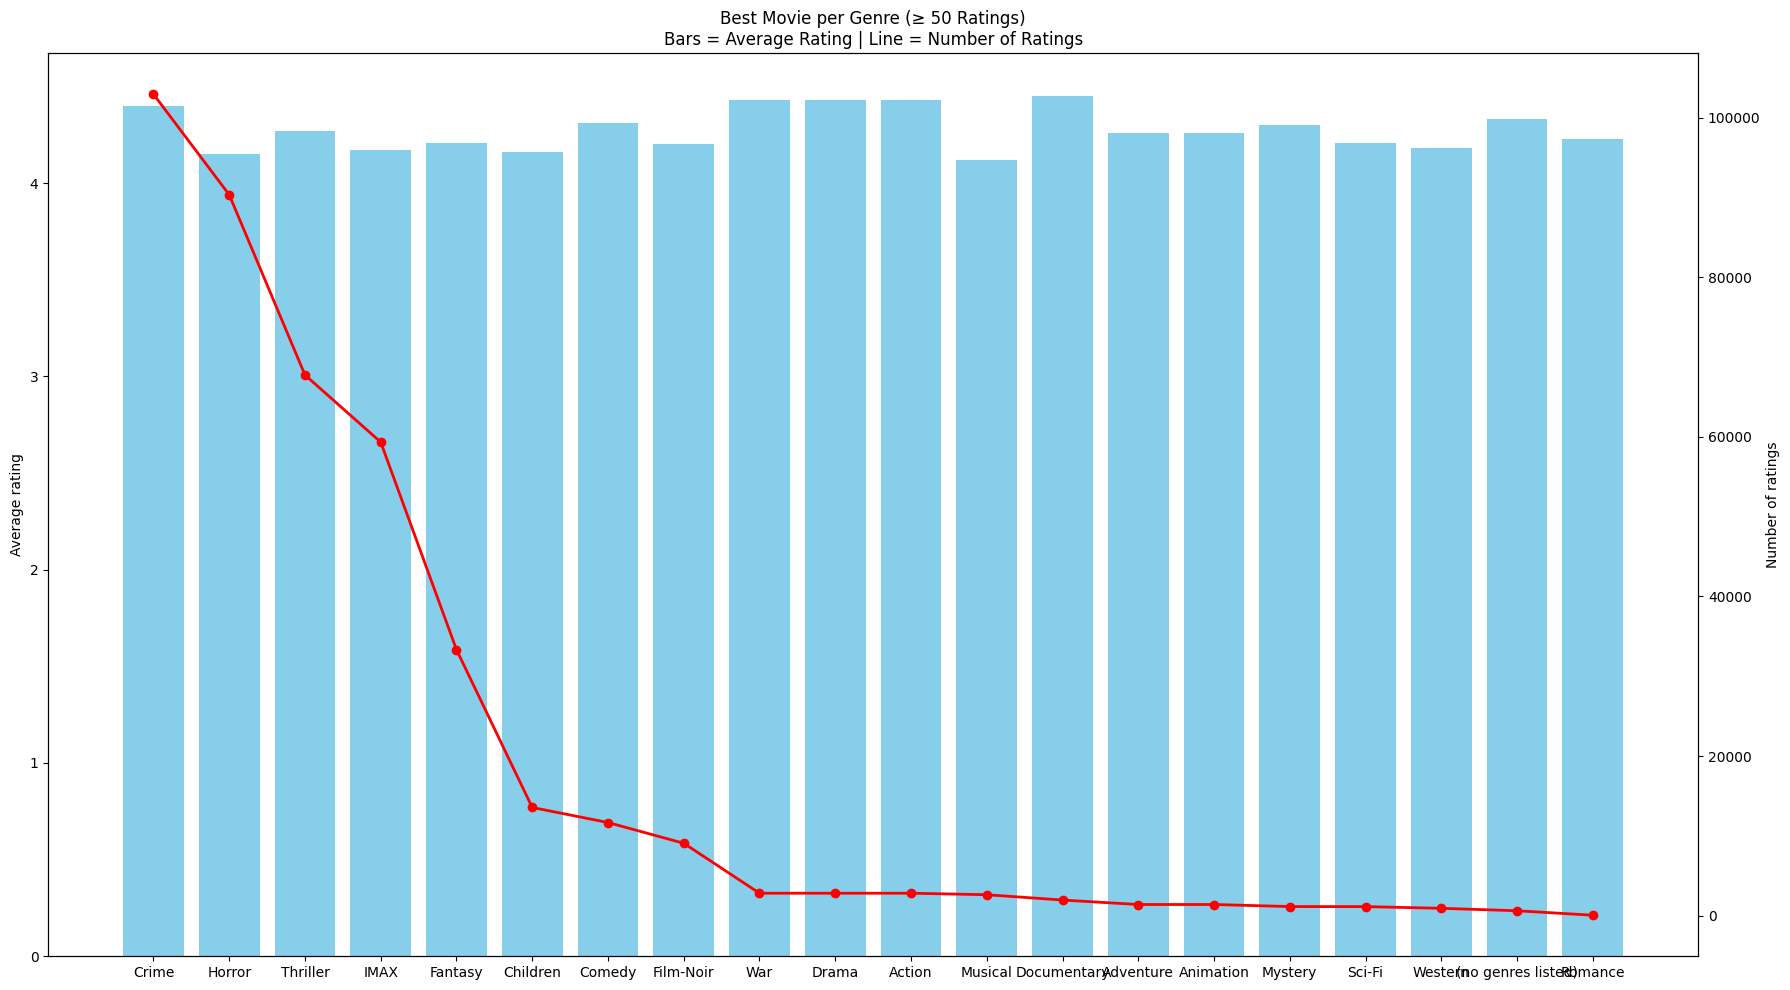

In [12]:
# Sort by number of ratings (descending)
df3_plot = df3.sort_values("total_ratings", ascending=False)

x = np.arange(len(df3_plot))   # 0..N-1

fig, ax1 = plt.subplots(figsize=(18, 10))

# Bars = average rating
ax1.bar(x, df3_plot["media_rating"], color="skyblue")
ax1.set_ylabel("Average rating")

# Line = number of ratings
ax2 = ax1.twinx()
ax2.plot(x, df3_plot["total_ratings"], marker="o", color="red", linewidth=2)
ax2.set_ylabel("Number of ratings")

# Genres as x-axis labels
plt.xticks(x, df3_plot["genre"], rotation=90)

plt.title("Best Movie per Genre (≥ 50 Ratings)\nBars = Average Rating | Line = Number of Ratings")
plt.tight_layout()
plt.show()


#### 2.4 Highest-rated movies by genre (with at least 50 ratings)

In [14]:
# Ranking of the most-rated movies per genre (with at least 50 ratings)

df4 = run_sql("""
WITH movie_genre AS (
    SELECT
        m.movieid,
        m.title,
        genre
    FROM movies_parquet AS m
    CROSS JOIN UNNEST(split(m.genres, '|')) AS t(genre)
),
movie_genre_stats AS (
    SELECT
        mg.genre,
        mg.movieid,
        mg.title,
        COUNT(*) AS total_ratings,
        AVG(r.rating) AS media_rating
    FROM movie_genre AS mg
    JOIN ratings_parquet AS r
        ON r.movieid = mg.movieid
    GROUP BY mg.genre, mg.movieid, mg.title
    HAVING COUNT(*) >= 50  -- keep only movies with at least 50 ratings
),
genre_ranking AS (
    SELECT
        genre,
        movieid,
        title,
        total_ratings,
        media_rating,
        ROW_NUMBER() OVER (
            PARTITION BY genre
            ORDER BY total_ratings DESC, media_rating DESC
        ) AS position
    FROM movie_genre_stats
)
SELECT
    genre,
    title,
    total_ratings,
    ROUND(media_rating, 2) AS media_rating
FROM genre_ranking
WHERE position = 1
ORDER BY genre, position
""")

df4

c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,genre,title,total_ratings,media_rating
0,(no genres listed),Hereditary (2018),4596,3.86
1,Action,"Matrix, The (1999)",93808,4.16
2,Adventure,Star Wars: Episode IV - A New Hope (1977),85010,4.10
3,Animation,Toy Story (1995),68997,3.90
4,Children,Toy Story (1995),68997,3.90
5,Comedy,Forrest Gump (1994),100296,4.05
6,Crime,"Shawshank Redemption, The (1994)",102929,4.40
7,Documentary,Bowling for Columbine (2002),16169,3.69
8,Drama,"Shawshank Redemption, The (1994)",102929,4.40
9,Fantasy,"Lord of the Rings: The Fellowship of the Ring,...",73122,4.09


#### 2.5 Most common tags

In [15]:
# Most frequent tag words

df5 = run_sql("""
SELECT
    word,
    COUNT(*) AS total
FROM (
    SELECT
        LOWER(TRIM(w)) AS word
    FROM tags_parquet
    CROSS JOIN UNNEST(split(tag, ' ')) AS t(w)
) sub
WHERE word <> ''
  AND LENGTH(word) > 2
  AND word NOT IN ('the', 'and', 'for', 'with', 'this', 'that', 'are')
GROUP BY word
ORDER BY total DESC
LIMIT 30
""")

df5


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,word,total
0,comedy,26298
1,based,19471
2,relationship,16448
3,film,16108
4,ending,15949
5,nudity,15130
6,dark,14702
7,female,14165
8,great,13617
9,book,12891


#### 2.6 Most repeated tags

In [16]:
# Most frequent tag words per movie

df6 = run_sql("""
WITH words_per_movie AS (
    SELECT
        t.movieid,
        t.word,
        COUNT(*) AS total
    FROM (
        SELECT
            movieid,
            LOWER(TRIM(w)) AS word
        FROM tags_parquet
        CROSS JOIN UNNEST(split(tag, ' ')) AS u(w)
    ) AS t
    WHERE t.word <> ''
      AND LENGTH(t.word) > 2
      AND t.word NOT IN ('the', 'and', 'for', 'with', 'this', 'that', 'are', 'was')
    GROUP BY t.movieid, t.word
),
ranking_per_movie AS (
    SELECT
        movieid,
        word,
        total,
        ROW_NUMBER() OVER (
            PARTITION BY movieid
            ORDER BY total DESC
        ) AS position
    FROM words_per_movie
)
SELECT
    m.movieid,
    m.title,
    r.word,
    r.total
FROM ranking_per_movie AS r
JOIN movies_parquet AS m
    ON r.movieid = m.movieid
WHERE r.position <= 5
ORDER BY r.total DESC
LIMIT 20
""")

df6


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,movieid,title,word,total
0,260,Star Wars: Episode IV - A New Hope (1977),space,1021
1,260,Star Wars: Episode IV - A New Hope (1977),sci-fi,833
2,260,Star Wars: Episode IV - A New Hope (1977),classic,618
3,109487,Interstellar (2014),space,572
4,296,Pulp Fiction (1994),comedy,529
5,296,Pulp Fiction (1994),tarantino,516
6,260,Star Wars: Episode IV - A New Hope (1977),adventure,500
7,2571,"Matrix, The (1999)",reality,490
8,318,"Shawshank Redemption, The (1994)",ending,477
9,164179,Arrival (2016),sci-fi,469


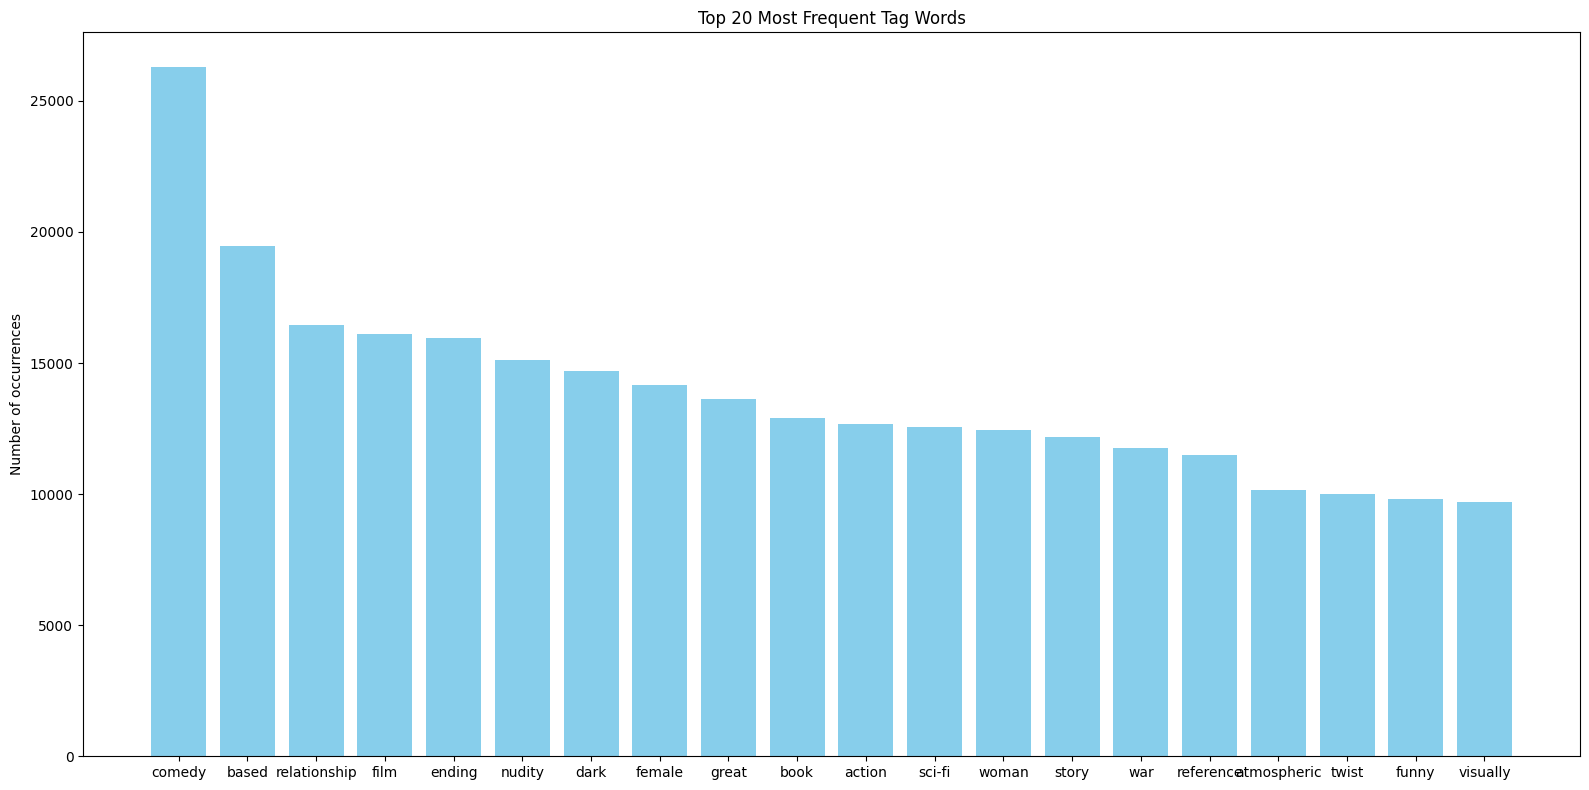

In [17]:
# Top 20 tag words
df_top = df5.sort_values("total", ascending=False).head(20)

plt.figure(figsize=(16, 8))
plt.bar(df_top["word"], df_top["total"], color="skyblue")

plt.title("Top 20 Most Frequent Tag Words")
plt.ylabel("Number of occurrences")
plt.xticks(rotation=0, ha="center")

plt.tight_layout()
plt.show()


#### 2.7 Users with the highest number of ratings and their average score

In [18]:
# Users with the highest number of ratings and average score

df7 = run_sql("""
SELECT
    r.userid,
    COUNT(*) AS total_ratings,
    ROUND(AVG(r.rating), 2) AS media_rating
FROM ratings_parquet AS r
GROUP BY r.userid
ORDER BY total_ratings DESC, media_rating DESC
LIMIT 20
""")

df7

c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,userid,total_ratings,media_rating
0,175325,33332,3.08
1,17035,9577,2.57
2,55653,9178,3.28
3,123465,9044,2.53
4,171795,9016,3.18
5,10202,7748,3.41
6,198515,7594,2.82
7,49305,7488,3.21
8,22744,7372,2.64
9,7858,7322,1.55


In [19]:
# Identify the users with the highest number of ratings and their average score

df_users = run_sql("""
SELECT
    userid,
    COUNT(*) AS total_ratings,
    ROUND(AVG(rating), 2) AS media_rating
FROM ratings_parquet
GROUP BY userid
""")


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


In [20]:
# Obtain basic statistics about the number of ratings per user
serie = df_users["total_ratings"]

mean_val = serie.mean()
std_val = serie.std()
median_val = serie.median()
mode_val = serie.mode()[0]          
min_val = serie.min()
max_val = serie.max()
desc = serie.describe()

print(
    f"Mean = {mean_val:.2f}\n"
    f"Standard deviation = {std_val:.2f}\n"
    f"Median = {median_val:.2f}\n"
    f"Mode = {mode_val}\n"
    f"Minimum = {min_val}\n"
    f"Maximum = {max_val}\n"
)


Mean = 159.25
Standard deviation = 282.03
Median = 73.00
Mode = 20
Minimum = 20
Maximum = 33332



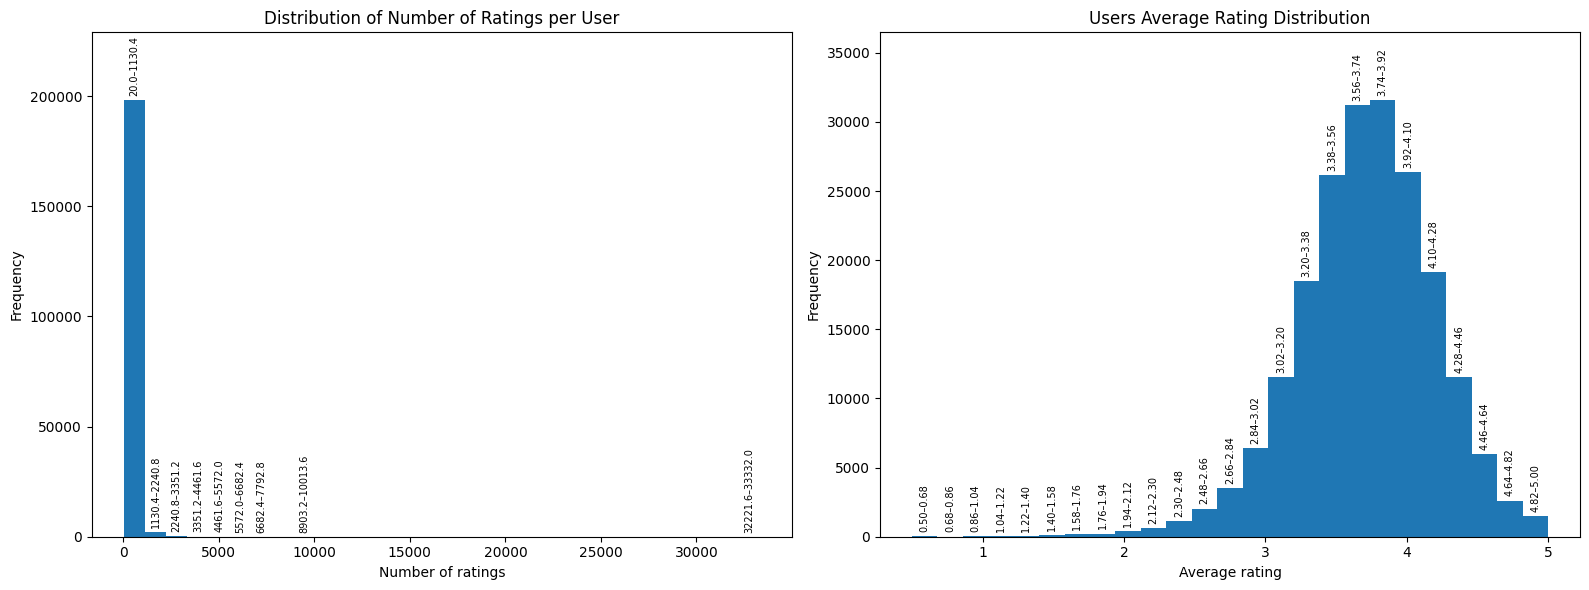

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram: number of ratings per user
counts, bins, patches = axes[0].hist(df_users["total_ratings"], bins=30)
axes[0].set_title("Distribution of Number of Ratings per User")
axes[0].set_xlabel("Number of ratings")
axes[0].set_ylabel("Frequency")



# Add label = interval for each bar
for i, patch in enumerate(patches):
    height = patch.get_height()
    if height > 0:
        interval_label = f"{bins[i]:.1f}–{bins[i+1]:.1f}"
        axes[0].annotate(
            interval_label,
            xy=(patch.get_x() + patch.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=7,
            rotation=90
        )

# Histogram: average rating per user
counts2, bins2, patches2 = axes[1].hist(df_users["media_rating"], bins=25)
axes[1].set_title("Users Average Rating Distribution")
axes[1].set_xlabel("Average rating")
axes[1].set_ylabel("Frequency")

# Add interval labels to second plot
for i, patch in enumerate(patches2):
    height = patch.get_height()
    if height > 0:
        interval_label = f"{bins2[i]:.2f}–{bins2[i+1]:.2f}"
        axes[1].annotate(
            interval_label,
            xy=(patch.get_x() + patch.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=7,
            rotation=90
        )

axes[0].set_ylim(top = axes[0].get_ylim()[1] * 1.1)
axes[1].set_ylim(top = axes[1].get_ylim()[1] * 1.1)

plt.tight_layout()
plt.show()


#### 2.8 Best 20 movies considering a Weighted classification (50% avg rating, 50% scaled nº ratings)

In [22]:
# Weighted top 20 (50% avg rating, 50% scaled number of ratings) — excludes movies with few ratings
MIN_RATINGS = 50

df_weighted = run_sql(f"""
WITH movie_stats AS (
    SELECT
        m.movieid,
        m.title,
        AVG(r.rating) AS avg_rating,
        COUNT(*) AS total_ratings
    FROM ratings_parquet AS r
    JOIN movies_parquet AS m
        ON r.movieid = m.movieid
    GROUP BY m.movieid, m.title
    HAVING COUNT(*) >= {MIN_RATINGS}    -- filter out movies with too few ratings
),
with_minmax AS (
    SELECT
        movieid,
        title,
        avg_rating,
        total_ratings,
        MIN(total_ratings) OVER () AS min_ratings,
        MAX(total_ratings) OVER () AS max_ratings
    FROM movie_stats
),
scored AS (
    SELECT
        movieid,
        title,
        ROUND(avg_rating, 2) AS avg_rating,
        total_ratings,
        -- linear scaling of total_ratings into the [1, 5] range
        CASE
            WHEN max_ratings = min_ratings THEN 3.0
            ELSE 1.0 + 4.0 * (total_ratings - min_ratings) / (max_ratings - min_ratings)
        END AS scaled_count_1_5
    FROM with_minmax
)
SELECT
    title,
    avg_rating,
    total_ratings,
    ROUND(scaled_count_1_5, 2) AS scaled_count_1_5,
    ROUND(0.5 * avg_rating + 0.5 * scaled_count_1_5, 2) AS weighted_score
FROM scored
ORDER BY weighted_score DESC, total_ratings DESC
LIMIT 20
""")

df_weighted


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,title,avg_rating,total_ratings,scaled_count_1_5,weighted_score
0,"Shawshank Redemption, The (1994)",4.40,102929,5.00,4.70
1,Pulp Fiction (1994),4.20,98409,4.82,4.51
2,Forrest Gump (1994),4.05,100296,4.90,4.47
3,"Matrix, The (1999)",4.16,93808,4.65,4.40
4,"Silence of the Lambs, The (1991)",4.15,90330,4.51,4.33
5,Star Wars: Episode IV - A New Hope (1977),4.10,85010,4.30,4.20
6,Fight Club (1999),4.23,77332,4.00,4.12
7,Schindler's List (1993),4.24,73849,3.87,4.05
8,"Lord of the Rings: The Fellowship of the Ring,...",4.09,73122,3.84,3.97
9,Star Wars: Episode V - The Empire Strikes Back...,4.13,72151,3.80,3.97


#### 2.9 Weighted Movie Scores
##### 2.9.1 Weighted Movie Scores Grouped by years
Years with at least 100 Films per Year and movies with at least 50 ratings

In [23]:
# Movies — Weighted Score by Year (≥ 50 ratings per movie)
MIN_RATINGS = 50

df_year = run_sql(f"""
WITH movie_stats AS (
    SELECT
        m.movieid,
        m.title,
        AVG(r.rating) AS avg_rating,
        COUNT(*) AS total_ratings
    FROM ratings_parquet AS r
    JOIN movies_parquet AS m
        ON r.movieid = m.movieid
    GROUP BY m.movieid, m.title
    HAVING COUNT(*) >= {MIN_RATINGS}
),
with_minmax AS (
    SELECT
        movieid,
        title,
        avg_rating,
        total_ratings,
        MIN(total_ratings) OVER () AS min_ratings,
        MAX(total_ratings) OVER () AS max_ratings
    FROM movie_stats
),
scored_with_year_str AS (
    SELECT
        movieid,
        title,
        ROUND(avg_rating, 2) AS avg_rating,
        total_ratings,
        CASE
            WHEN max_ratings = min_ratings THEN 3.0
            ELSE 1.0 + 4.0 * (total_ratings - min_ratings) / (max_ratings - min_ratings)
        END AS scaled_count_1_5,
        regexp_extract(title, '.*\\((\\d{{4}})\\)$', 1) AS year_str
    FROM with_minmax
),
scored AS (
    SELECT
        movieid,
        title,
        avg_rating,
        total_ratings,
        scaled_count_1_5,
        CAST(year_str AS INTEGER) AS year
    FROM scored_with_year_str
    WHERE year_str IS NOT NULL AND year_str <> ''
)
SELECT
    year,
    AVG(0.5 * avg_rating + 0.5 * scaled_count_1_5) AS avg_weighted_score,
    COUNT(*) AS n_movies
FROM scored
GROUP BY year
HAVING COUNT(*) >= 101
ORDER BY year
""")

df_year


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,year,avg_weighted_score,n_movies
0,1980,2.106506,152
1,1981,2.115081,152
2,1982,2.162012,140
3,1983,2.158018,123
4,1984,2.162052,138
5,1985,2.149165,159
6,1986,2.109726,182
7,1987,2.084396,203
8,1988,2.099428,211
9,1989,2.106998,204


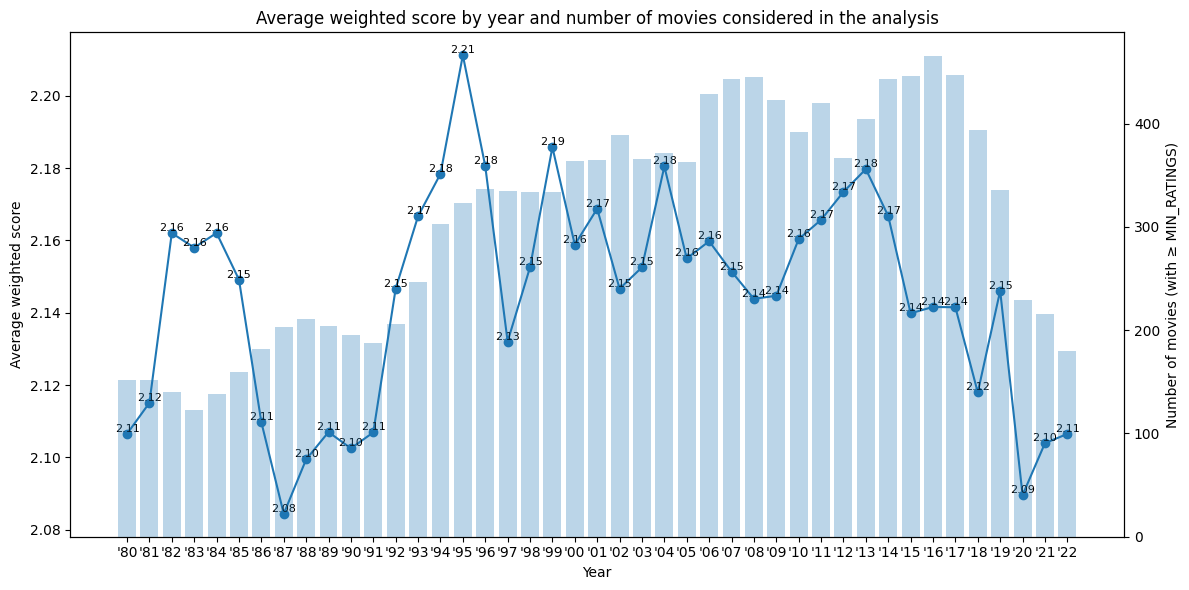

In [25]:
# Yearly Weighted Movie Scores 
# Years with at least 100 Films per Year and movies with at least 50 ratings
fig, ax1 = plt.subplots(figsize=(12, 6))

years = df_year["year"]
scores = df_year["avg_weighted_score"]
counts = df_year["n_movies"]

# Create compact labels showing only the last 2 digits of the year
year_labels = years.astype(str).apply(lambda x: "'" + x[-2:])

# 1) Line plot: weighted score (left axis)
ax1.plot(years, scores, marker="o")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average weighted score")
ax1.tick_params(axis="y")

# Show values at each point
for x, y in zip(years, scores):
    ax1.text(x, y, f"{y:.2f}", fontsize=8, ha="center", va="bottom")

# 2) Bar chart: number of movies used in the calculation (right axis)
ax2 = ax1.twinx()
ax2.bar(years, counts, alpha=0.3)
ax2.set_ylabel("Number of movies (with ≥ MIN_RATINGS)")
ax2.tick_params(axis="y")

# Apply compact year labels to the X-axis
plt.xticks(years, year_labels, rotation=45)

plt.title("Average weighted score by year and number of movies considered in the analysis")
plt.tight_layout()
plt.show()


##### 2.9.2 Weighted Movie Scores Grouped by decades
Years with at least 100 Films per Year and movies with at least 50 ratings

In [26]:
# Movies — Weighted score aggregated by decade (≥ MIN_RATINGS per movie, ≥ 100 movies per decade)

df_decade = run_sql(f"""
WITH movie_stats AS (
    SELECT
        m.movieid,
        m.title,
        AVG(r.rating) AS avg_rating,
        COUNT(*) AS total_ratings
    FROM ratings_parquet AS r
    JOIN movies_parquet AS m
        ON r.movieid = m.movieid
    GROUP BY m.movieid, m.title
    HAVING COUNT(*) >= {MIN_RATINGS}
),
with_minmax AS (
    SELECT
        movieid,
        title,
        avg_rating,
        total_ratings,
        MIN(total_ratings) OVER () AS min_ratings,
        MAX(total_ratings) OVER () AS max_ratings
    FROM movie_stats
),
scored_with_year_str AS (
    SELECT
        movieid,
        title,
        ROUND(avg_rating, 2) AS avg_rating,
        total_ratings,
        CASE
            WHEN max_ratings = min_ratings THEN 3.0
            ELSE 1.0 + 4.0 * (total_ratings - min_ratings) / (max_ratings - min_ratings)
        END AS scaled_count_1_5,
        regexp_extract(title, '.*\\((\\d{{4}})\\)$', 1) AS year_str
    FROM with_minmax
),
scored AS (
    SELECT
        movieid,
        title,
        avg_rating,
        total_ratings,
        scaled_count_1_5,
        CAST(year_str AS INTEGER) AS year
    FROM scored_with_year_str
    WHERE year_str IS NOT NULL AND year_str <> ''
),
with_scores AS (
    SELECT
        year,
        (0.5 * avg_rating + 0.5 * scaled_count_1_5) AS weighted_score
    FROM scored
)
SELECT
    CAST(FLOOR(year / 10) * 10 AS INTEGER) AS decade,
    ROUND(AVG(weighted_score), 3) AS avg_score_decade,
    COUNT(*) AS movies_in_decade
FROM with_scores
GROUP BY CAST(FLOOR(year / 10) * 10 AS INTEGER)
HAVING COUNT(*) >= 100
ORDER BY decade
""")

df_decade


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,decade,avg_score_decade,movies_in_decade
0,1930,2.300,224
1,1940,2.299,347
2,1950,2.286,480
3,1960,2.267,688
4,1970,2.227,896
5,1980,2.121,1664
6,1990,2.161,2802
7,2000,2.156,3958
8,2010,2.153,4114
9,2020,2.102,697


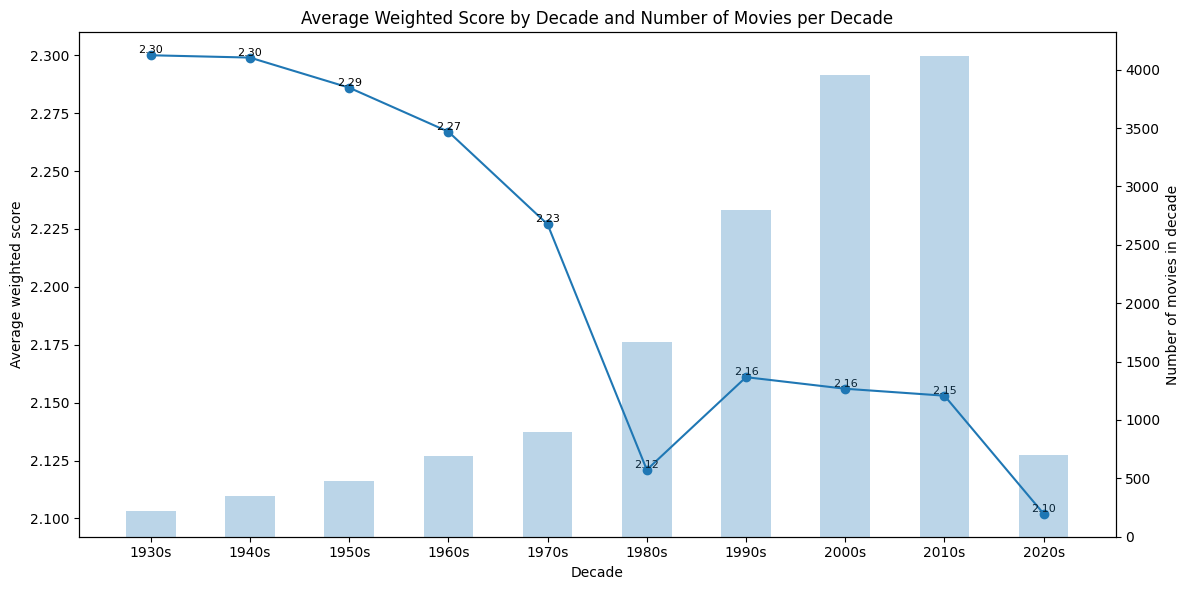

In [27]:
# Decade vs Average Weighted Score and number of movies
decades = df_decade["decade"].astype(int)
scores = df_decade["avg_score_decade"]
counts = df_decade["movies_in_decade"]

# Nice labels for the X-axis: "1980s", "1990s", ...
decade_labels = decades.astype(str) + "s"

fig, ax1 = plt.subplots(figsize=(12, 6))

# 1) Line plot: average weighted score per decade (left axis)
ax1.plot(decades, scores, marker="o")
ax1.set_xlabel("Decade")
ax1.set_ylabel("Average weighted score")
ax1.tick_params(axis="y")

# Add values above each point
for x, y in zip(decades, scores):
    ax1.text(x, y, f"{y:.2f}", fontsize=8, ha="center", va="bottom")

# 2) Bar plot: number of movies per decade (right axis)
ax2 = ax1.twinx()
ax2.bar(decades, counts, width=5, alpha=0.3)
ax2.set_ylabel("Number of movies in decade")
ax2.tick_params(axis="y")

# Apply "1980s" style labels on the X-axis
plt.xticks(decades, decade_labels, rotation=45)

plt.title("Average Weighted Score by Decade and Number of Movies per Decade")
plt.tight_layout()
plt.show()


### 2.10 Most common tags and corresponding average score

In [28]:
df_tags = run_sql("""
SELECT
    word,
    COUNT(*) AS total,
    ROUND(AVG(r.rating), 3) AS avg_rating
FROM (
    SELECT
        t.movieid,
        LOWER(TRIM(w)) AS word
    FROM tags_parquet t
    CROSS JOIN UNNEST(split(t.tag, ' ')) AS u(w)
) words
JOIN ratings_parquet r
    ON r.movieid = words.movieid
WHERE word <> ''
  AND LENGTH(word) > 2
  AND word NOT IN ('the', 'and', 'for', 'with', 'this', 'that', 'are')
GROUP BY word
ORDER BY total DESC
LIMIT 30
""")

df_tags


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,word,total,avg_rating
0,comedy,434912622,3.886
1,ending,382447400,4.055
2,great,361383724,4.061
3,sci-fi,330167661,3.903
4,dark,319959705,3.992
5,action,271863603,3.836
6,twist,252980114,4.067
7,classic,242739425,4.052
8,space,229706348,3.942
9,atmospheric,221492718,4.010


The previous query took 6 m as 53s to complete!

### Top Tag Words with Their Average Ratings

Running this query over the full 33M–rating dataset in DuckDB was not feasible: the intermediate result becomes extremely large after exploding all tag words and joining them with every rating for each movie. In practice, this leads to billions of intermediate rows, which DuckDB cannot process in memory for this workload.

Using Athena, however, the query successfully completed in about 7 minutes, thanks to Athena’s distributed execution engine and the ability to scale the join and aggregation stages across multiple workers. This allowed us to compute global tag-word statistics at the 33M scale.

The results show several clear patterns:

- __Genre-like terms__ (e.g., comedy, sci-fi, action, fantasy, adventure) dominate the most frequent words. These reflect how users tag movies by category more than by detailed attributes.

- __Qualitative descriptors__ (e.g great, dark, classic, atmospheric, surreal) also appear frequently, often associated with above-average ratings.

- __Words linked to narrative elements__ (e.g ending, twist, story, plot) tend to have higher average ratings, suggesting that users apply these tags more often to well-received films.

- __Specific thematic or stylistic tags__ (e.g psychology, oscar, soundtrack, war, violence) also appear with relatively strong average ratings.

Overall, the combination of tag frequency and average rating highlights how users describe and perceive movies: popular tags cluster around genre, tone, and key narrative features, and many high-frequency words correspond to films with ratings close to 4.0.

#### Close connection

In [ ]:
conn.close()
print("Athena's connection closed.")

Athena's connection closed.
